# Tensor和Numpy的区别

## tensor数据和ndarray数据相互转换
+ t.from_numpy() # 把ndarray数据转换为tensor数据
+ t.Tensor()  # 把ndarray数据转换为tensor数据
+ c = b.numpy()  # 把tensor数据转换为ndarray数据

## 广播法则
（让所有输入数组都向其中shape最长的数组看齐，shape中不足部分通过在前面加1补齐）

+ torch当前支持自动广播法则，但更推荐使用以下两个方法进行手动广播，这样更直观，更不容出错
    + unsqueeze或view：为数据某一维的形状补1
    + expand或expand_as：重复数组，实现当输入的数组的某个维度的长度为1时，计算时沿此维度复制扩充成一样的形状

In [13]:
a = t.ones(3, 2)
b = t.zeros(2, 3, 1)
# 自动广播法则：
# + a是二维，b是三维，所在现在较小的a前面补1（等价于a.unsqueeze(0)，a的形状变成(0,2,3)）
# + 由于a和b在第一维和第三维的形状不一样，利用广播法则，两个形状都变成了(2,3,2)
a + b

tensor([[[1., 1.],
         [1., 1.],
         [1., 1.]],

        [[1., 1.],
         [1., 1.],
         [1., 1.]]])

In [14]:
a.unsqueeze(0).expand(2, 3, 2) + b.expand(
    2, 3, 2)  # 等价于a.view(1,3,2).expand(2,3,2) + b.expand(2,3,2)


tensor([[[1., 1.],
         [1., 1.],
         [1., 1.]],

        [[1., 1.],
         [1., 1.],
         [1., 1.]]])

# Tensor内部存储结构
**大多数操作并不会修改tensor的数据，只是修改tensor的头信息**
这种做法减少了内存的占用，并且更加节省了时间。但是有时候这种操作会导致tensor不连续，此时可以通过contiguous方法让其连续，但是这种方法会复制数据到新的内存空间，不再和原来的数据共享内存。

# Tensor的持久化和向量化作

## 持久化
和sklearn中的持久化一样，保存一个模型或者特有的数据为pkl数据。但是tensor在加载数据的时候还可以把gpu tensor映射到cpu上或者其他gpu上

In [ ]:
if t.cuda.is_available():
    a = a.cuda(1)  # 把a转为gpu1上的tensor
    t.save(a, 'a.pkl')
# 加载为b，存储于gpu1上（因为保存时tensor就在gpu1上）
b = t.load('a.pkl')
# 加载为c，存储于cpu
c = t.load('a.pkl', map_location=lambda storage, loc: storage)
# 加载为d，存储于gpu0上
d = t.load('a.pkl', map_location={'cuda:1': 'cuda:0'})

## 向量化
**在写代码时，应该养成向量化的思维习惯。**

In [15]:
def for_loop_add(x, y):
    result = []
    for i, j in zip(x, y):
        result.append(i + j)
    return t.Tensor(result)


x = t.zeros(100)
y = t.ones(100)

%timeit -n 100 for_loop_add(x,y)
%timeit -n 100 x+y

316 µs ± 2.15 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)
2.14 µs ± 940 ns per loop (mean ± std. dev. of 7 runs, 100 loops each)


## 注意事项

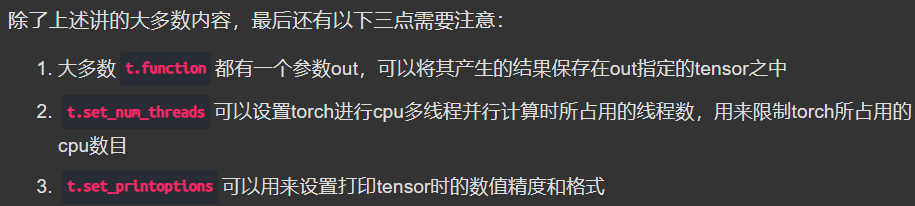

In [16]:
b = t.FloatTensor()
t.randn(2, 3, out=b)
b


tensor([[-1.9271,  1.0428, -0.0535],
        [-0.7795, -0.1962,  1.1034]], dtype=torch.float32)